<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [ ]:
pip install pyforest 

  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14607 sha256=c3c6130bf8bb2fd635e13c344cbee54ddf6cf6a5298b1b833d5ef3587c4c9970
  Stored in directory: /root/.cache/pip/wheels/61/1c/da/48e6c884142d485475d852d69d20a096aba5beceb338822893
Successfully built pyforest


In [ ]:
pip install cufflinks

In [ ]:
import pyforest
import plotly
import cufflinks as cf
#Enabling the offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
#To display the plots
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [ ]:
df_male = pd.read_csv('male.csv',encoding='latin-1')

<IPython.core.display.Javascript object>

In [ ]:
df_female= pd.read_csv('female.csv')

<IPython.core.display.Javascript object>

# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

In [34]:
df_male.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458

In [35]:
df_female.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

In [36]:
print(df_male.shape)
print(df_female.shape)

(4082, 108)
(1986, 108)


In [37]:
df0 = pd.concat([df_male,df_female], axis=0, ignore_index=True)
df0.head()

<IPython.core.display.Javascript object>

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference,SubjectId
0,10027.0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand,NaN
1,10032.0,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand,NaN
2,10033.0,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand,NaN
3,10092.0,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand,NaN
4,10093.0,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372

In [ ]:
df0.shape

(6068, 109)

In [ ]:
df0.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 109 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    subjectid                       float64
 1    abdominalextensiondepthsitting  int64  
 2    acromialheight                  int64  
 3    acromionradialelength           int64  
 4    anklecircumference              int64  
 5    axillaheight                    int64  
 6    balloffootcircumference         int64  
 7    balloffootlength                int64  
 8    biacromialbreadth               int64  
 9    bicepscircumferenceflexed       int64  
 10   bicristalbreadth                int64  
 11   bideltoidbreadth                int64  
 12   bimalleolarbreadth              int64  
 13   bitragionchinarc                int64  
 14   bitragionsubmandibulararc       int64  
 15   bizygomaticbreadth              int64  
 16   buttockcircumference            int64  
 17   buttockdepth

In [ ]:
df0.duplicated().sum()

0

In [ ]:
df0.isnull().sum().any()

True

In [20]:
df0.isnull().sum()

subjectid                         1986
abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
anklecircumference                   0
axillaheight                         0
balloffootcircumference              0
balloffootlength                     0
biacromialbreadth                    0
bicepscircumferenceflexed            0
bicristalbreadth                     0
bideltoidbreadth                     0
bimalleolarbreadth                   0
bitragionchinarc                     0
bitragionsubmandibulararc            0
bizygomaticbreadth                   0
buttockcircumference                 0
buttockdepth                         0
buttockheight                        0
buttockkneelength                    0
buttockpopliteallength               0
calfcircumference                    0
cervicaleheight                      0
chestbreadth                         0
chestcircumference                   0
chestdepth               

In [22]:
df0.subjectid.value_counts(dropna=False)

NaN        1986
26208.0       1
26170.0       1
26173.0       1
26185.0       1
           ... 
15026.0       1
15027.0       1
15028.0       1
15029.0       1
17237.0       1
Name: subjectid, Length: 4083, dtype: int64

In [25]:
df0.Ethnicity.value_counts(dropna=False).head()

NaN                   4647
Mexican                357
Puerto Rican           183
Caribbean Islander     124
Filipino                67
Name: Ethnicity, dtype: int64

In [26]:
df0.SubjectId.value_counts(dropna=False).head()

NaN        4082
25729.0       1
25766.0       1
25764.0       1
25762.0       1
Name: SubjectId, dtype: int64

In [38]:
df0.drop(["subjectid","Ethnicity","SubjectId"], axis=1, inplace=True)


In [40]:
df0.isnull().sum().head()

abdominalextensiondepthsitting    0
acromialheight                    0
acromionradialelength             0
anklecircumference                0
axillaheight                      0
dtype: int64

In [45]:
df0.columns

Index(['abdominalextensiondepthsitting', 'acromialheight', 'acromionradialelength', 'anklecircumference', 'axillaheight', 'balloffootcircumference', 'balloffootlength', 'biacromialbreadth', 'bicepscircumferenceflexed', 'bicristalbreadth',
       ...
       'Component', 'Branch', 'PrimaryMOS', 'SubjectsBirthLocation', 'SubjectNumericRace', 'DODRace', 'Age', 'Heightin', 'Weightlbs', 'WritingPreference'], dtype='object', length=106)

In [46]:
df0.SubjectsBirthLocation.value_counts()

California                  446
New York                    420
Texas                       397
Indiana                     266
Oklahoma                    221
Illinois                    216
Florida                     210
Minnesota                   200
Michigan                    196
Mississippi                 194
Georgia                     170
Alabama                     164
South Carolina              161
North Carolina              149
Ohio                        142
Louisiana                   137
Pennsylvania                132
Virginia                    118
Massachusetts               112
Wisconsin                   102
Germany                      92
New Jersey                   89
Puerto Rico                  88
Arizona                      84
Missouri                     84
Colorado                     81
Maryland                     80
Tennessee                    74
Kentucky                     69
Washington                   66
Kansas                       63
South Da

In [47]:
df0.SubjectNumericRace.value_counts()

1        3561
2        1026
3         541
31        160
51        126
8         116
4         109
21         60
6          59
41         46
61         35
23         34
28         26
251        20
5          18
18         18
25         14
351        10
38          9
64          8
62          8
35          8
42          7
63          7
231         6
43          5
235         4
218         3
651         2
2351        2
318         2
641         2
451         2
423         2
431         2
2518        2
48          1
631         1
4251        1
428         1
238         1
358         1
425         1
42351       1
Name: SubjectNumericRace, dtype: int64

In [54]:
df0["DODRace"].value_counts()


1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64

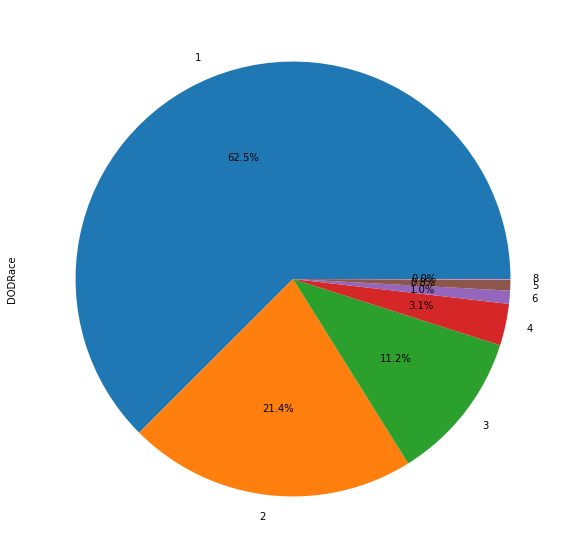

In [55]:
df0["DODRace"].value_counts().plot(kind="pie", autopct='%1.1f%%',figsize=(10,10));

In [57]:
df0.Gender.value_counts().head()

Male      4082
Female    1986
Name: Gender, dtype: int64

In [62]:
df0.Age.max()

58

In [63]:
df0.Age.min()

17

In [56]:
df0.weightkg.value_counts().head()

791    25
775    24
695    23
727    23
882    23
Name: weightkg, dtype: int64

In [ ]:
data.drop(drop_list, axis=1, inplace=True)

In [ ]:
data.isnull().sum().any()

False

In [ ]:
data.shape

(6068, 106)

In [ ]:
# to find how many unique values object features have
for col in data.select_dtypes("object"):
  print(f"{col} has {data[col].nunique()} unique value")
    

Gender has 2 unique value
Date has 253 unique value
Installation has 12 unique value
Component has 3 unique value
Branch has 3 unique value
PrimaryMOS has 285 unique value
SubjectsBirthLocation has 152 unique value
WritingPreference has 3 unique value


In [ ]:
data.DODRace.unique()

array([1, 2, 3, 4, 5, 6, 8], dtype=int64)

In [ ]:
data["DODRace"] = data.DODRace.map({
    1: "White",
    2: "Black",
    3: "Hispanic",
    4: "Asian",
    5: "Native American",
    6: "Pacific Islander",
    8: "Other"
})

In [ ]:
data.groupby(["Component"])["DODRace"].value_counts() #.iplot(kind="barh")

Component            DODRace         
Army National Guard  White               1855
                     Black                499
                     Hispanic             253
                     Asian                 60
                     Native American       24
                     Pacific Islander      17
Army Reserve         White                114
                     Black                 52
                     Hispanic              41
                     Asian                  9
                     Pacific Islander       3
                     Native American        1
Regular Army         White               1823
                     Black                747
                     Hispanic             385
                     Asian                119
                     Pacific Islander      39
                     Native American       24
                     Other                  3
Name: DODRace, dtype: int64

In [ ]:
data.groupby(["Component", "Branch"])["DODRace"].value_counts() #.iplot(kind="barh")

Component            Branch                  DODRace         
Army National Guard  Combat Arms             White               623
                                             Black                79
                                             Hispanic             74
                                             Asian                18
                                             Native American       9
                                             Pacific Islander      4
                     Combat Service Support  White               917
                                             Black               312
                                             Hispanic            142
                                             Asian                33
                                             Pacific Islander     11
                                             Native American      10
                     Combat Support          White               315
                                         

In [ ]:
drop_list1 = [
    "Date", "Installation", "Component", "Branch", "PrimaryMOS",
    "Weightlbs", "Heightin",   
]

data.drop(drop_list1, axis=1, inplace=True)

In [ ]:
data.columns

Index(['abdominalextensiondepthsitting', 'acromialheight', 'acromionradialelength', 'anklecircumference', 'axillaheight', 'balloffootcircumference', 'balloffootlength', 'biacromialbreadth', 'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth', 'bimalleolarbreadth', 'bitragionchinarc', 'bitragionsubmandibulararc', 'bizygomaticbreadth', 'buttockcircumference', 'buttockdepth', 'buttockheight', 'buttockkneelength', 'buttockpopliteallength', 'calfcircumference', 'cervicaleheight', 'chestbreadth', 'chestcircumference', 'chestdepth', 'chestheight', 'crotchheight', 'crotchlengthomphalion', 'crotchlengthposterioromphalion', 'earbreadth', 'earlength', 'earprotrusion', 'elbowrestheight', 'eyeheightsitting', 'footbreadthhorizontal', 'footlength', 'forearmcenterofgriplength', 'forearmcircumferenceflexed', 'forearmforearmbreadth', 'forearmhandlength', 'functionalleglength', 'handbreadth', 'handcircumference', 'handlength', 'headbreadth', 'headcircumference', 'headlength',
       'heel

In [ ]:
data.SubjectNumericRace.value_counts()

1        3561
2        1026
3         541
31        160
51        126
8         116
4         109
21         60
6          59
41         46
61         35
23         34
28         26
251        20
5          18
18         18
25         14
351        10
38          9
64          8
62          8
35          8
42          7
63          7
231         6
43          5
235         4
218         3
651         2
2351        2
318         2
641         2
451         2
423         2
431         2
2518        2
48          1
631         1
4251        1
428         1
238         1
358         1
425         1
42351       1
Name: SubjectNumericRace, dtype: int64

In [ ]:
data.drop("SubjectNumericRace",axis=1,inplace=True)

In [ ]:
data.DODRace.value_counts()

White               3792
Black               1298
Hispanic             679
Asian                188
Pacific Islander      59
Native American       49
Other                  3
Name: DODRace, dtype: int64

In [ ]:
data.DODRace.value_counts()

White               3792
Black               1298
Hispanic             679
Asian                188
Pacific Islander      59
Native American       49
Other                  3
Name: DODRace, dtype: int64

In [ ]:
data = data[(data["DODRace"] == "White") | (data["DODRace"] == "Black") |
                (data["DODRace"] == "Hispanic")]
data

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,DODRace,Age,WritingPreference
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,North Dakota,White,41,Right hand
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,New York,White,35,Left hand
2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,New York,Black,42,Left hand
3,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,Wisconsin,White,31,Right hand
4,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,188,954,Male,North Carolina,Black,21,Right hand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [ ]:
data.reset_index(drop=True, inplace=True)

In [ ]:
data

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,DODRace,Age,WritingPreference
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,North Dakota,White,41,Right hand
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,New York,White,35,Left hand
2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,New York,Black,42,Left hand
3,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,Wisconsin,White,31,Right hand
4,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,188,954,Male,North Carolina,Black,21,Right hand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

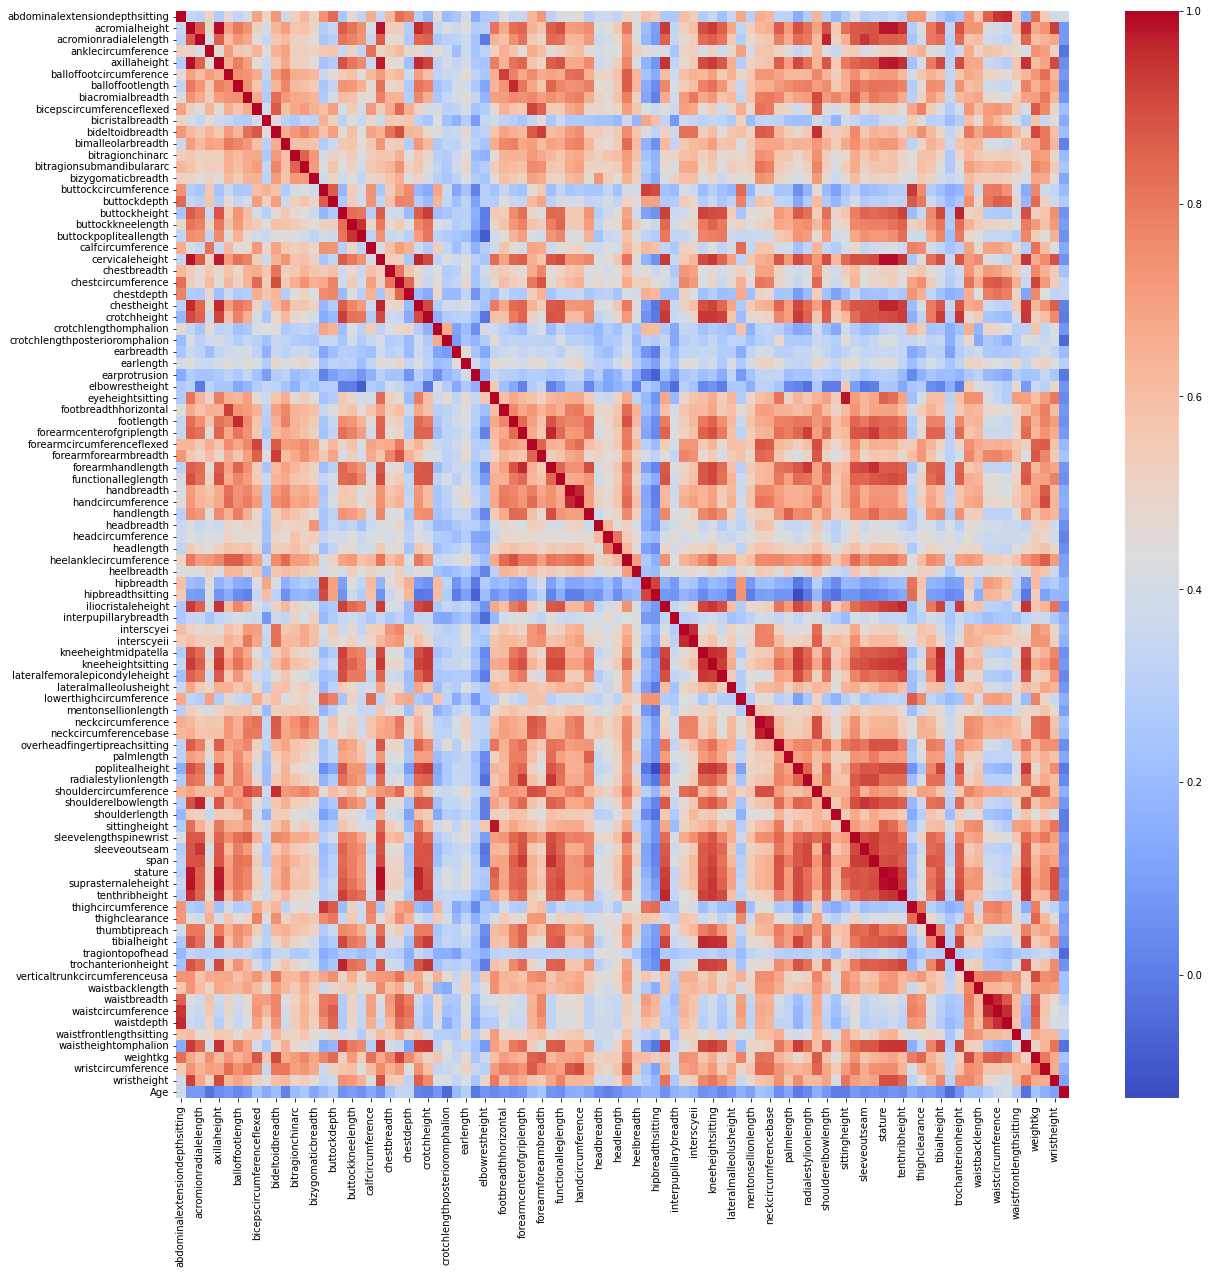

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), cmap ="coolwarm")

In [ ]:
df_temp = data.corr()

feature =[]
collinear=[]
for col in df_temp.columns:
    for i in df_temp.index:
        if (df_temp[col][i]> .9 and df_temp[col][i] < 1) or (df_temp[col][i]< -.9 and df_temp[col][i] > -1) :
                feature.append(col)
                collinear.append(i)
                # print(f"multicolinearity alert in between {col} - {i}")

In [ ]:
my_dict = {"feature":feature, "collinear":collinear}
df_col = pd.DataFrame(my_dict)
df_col.head()

<IPython.core.display.Javascript object>

,feature,collinear
0,abdominalextensiondepthsitting,waistcircumference
1,abdominalextensiondepthsitting,waistdepth
2,acromialheight,axillaheight
3,acromialheight,cervicaleheight
4,acromialheight,chestheight


In [ ]:
df_col.value_counts("feature")

feature
kneeheightsitting                 19
iliocristaleheight                15
tenthribheight                    15
axillaheight                      14
waistheightomphalion              14
crotchheight                      14
cervicaleheight                   14
kneeheightmidpatella              12
suprasternaleheight               12
chestheight                       11
tibialheight                      11
acromialheight                    10
poplitealheight                   10
span                               9
trochanterionheight                9
stature                            9
lateralfemoralepicondyleheight     7
buttockheight                      7
sleeveoutseam                      6
forearmhandlength                  5
radialestylionlength               4
shoulderelbowlength                3
functionalleglength                3
waistcircumference                 3
bideltoidbreadth                   3
weightkg                           3
forearmcenterofgriplength     

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [ ]:
X = data.drop("DODRace",axis=1)
X = pd.get_dummies(data=X, drop_first=True)
y = data.DODRace

<IPython.core.display.Javascript object>

# LOGISTIC REGRESSION: GRADIENT DECENT TABANLI MODEL.SVM: DISTANCE TABANLI MODEL.BUNLAR MUTLAKA DUMMIES_FEATURE'A DÖNÜŞTÜRÜLÜR.TREE BASE MODELLERDE DUMMIES YAPILMAZ!

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify =y)

<IPython.core.display.Javascript object>

### Dengesizilik olsa da olmasa da stratify =y kullanılır.Bu hem train hem de test datalarının dengeli bir şekilde dağılmasını sağlar.

In [ ]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (4615, 232)
Train target shape   :  (4615,)
Test features shape  :  (1154, 232)
Test target shape    :  (1154,)


# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [ ]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [ ]:
from sklearn.pipeline import Pipeline
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
pipe_log_model = Pipeline(steps=operations)

### scale yapacaksak mutlaka pipe-line'ı cross-validation ve grid search yaparken data leakage olmaması için  kullanıyoruz.

### Logistic regresyon üzerinden feature importance, feature importance yaparken de scale  yapılır.

### MinMaxScaler(); dummies feature'ların 1 ve 0 olarak kalması içindir.

### class_weight='balanced'; datada dengesizlik olduğu için yazılır. Başta default değerler ile yapmalı ve skorlar görülmeli.

In [ ]:
pipe_log_model.fit(X_train,y_train)
eval_metric(pipe_log_model, X_train, y_train, X_test, y_test)

Test_Set
[[240  13   7]
 [  5 111  20]
 [ 25  89 644]]
              precision    recall  f1-score   support

       Black       0.89      0.92      0.91       260
    Hispanic       0.52      0.82      0.64       136
       White       0.96      0.85      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.86      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 971   37   30]
 [  21  456   66]
 [  58  354 2622]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93      1038
    Hispanic       0.54      0.84      0.66       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.91      0.88      0.89      4615



### pipe_log_model.fit(X_train,y_train): model eğitme

### eval_metric(pipe_log_model, X_train, y_train, X_test, y_test): skorları alma

### Hispanic       0.52      0.82      0.64       136: değerlerinde dengesizlik olduğundan amaç bunları recall değerini artırarak dengesizliği gidermek.Bunun üzerine yoğunlaşmalı.

In [ ]:
scoring = {"f1_Hispanic" : make_scorer(f1_score, average = None, labels =["Hispanic"]),
           "precision_Hispanic" : make_scorer(precision_score, average = None, labels =["Hispanic"]),
           "recall_Hispanic" : make_scorer(recall_score, average = None, labels =["Hispanic"])}

### Yukarıda hispanicin skorlarına yoğunlaşılıyor.Amaç hispanicin skorlarını iyileştirmek.

In [ ]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

<IPython.core.display.Javascript object>

test_f1_Hispanic           0.599993
test_precision_Hispanic    0.492007
test_recall_Hispanic       0.771481
dtype: float64

### yukarıdaki kod cross validation kodu. Cross validation yaparken model sıfırlanır.

### Logistic Model GridsearchCV

In [ ]:
recall_Hispanic =  make_scorer(recall_score, average=None, labels=["Hispanic"])

In [ ]:
param_grid = {
    "log__C": [0.1, 0.5, 1],
    'log__penalty': ["l1", "l2"],
    'log__solver': ['liblinear', 'lbfgs'],
}

In [ ]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
model = Pipeline(steps=operations)

log_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=3,
                              scoring=recall_Hispanic,
                              n_jobs=-1, cv=5)

In [ ]:
log_model_grid.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('log',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=101))]),
             n_jobs=-1,
             param_grid={'log__C': [0.1, 0.5, 1], 'log__penalty': ['l1', 'l2'],
                         'log__solver': ['liblinear', 'lbfgs']},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [ ]:
log_model_grid.best_params_

{'log__C': 1, 'log__penalty': 'l2', 'log__solver': 'lbfgs'}

In [ ]:
log_model_grid.best_score_

0.7697757390417942

In [ ]:
eval_metric(log_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[240  13   7]
 [  5 111  20]
 [ 25  89 644]]
              precision    recall  f1-score   support

       Black       0.89      0.92      0.91       260
    Hispanic       0.52      0.82      0.64       136
       White       0.96      0.85      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.86      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 971   37   30]
 [  21  456   66]
 [  58  354 2622]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93      1038
    Hispanic       0.54      0.84      0.66       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.91      0.88      0.89      4615



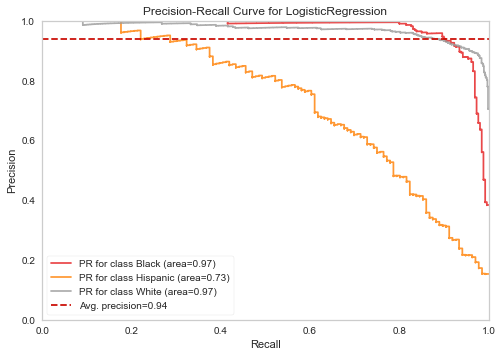

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve

operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
model = Pipeline(steps=operations)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

### Dengesiz datalarda PrecisionRecallCurve kullanılır.

In [ ]:
viz.score_#["Hispanic"]

{'Black': 0.974186577359066,
 'Hispanic': 0.7330847535352747,
 'White': 0.9713736158084771,
 'micro': 0.9380870148241519}

In [ ]:
y_pred = log_model_grid.predict(X_test)

log_AP = viz.score_["Hispanic"]
log_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
log_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## Lojistic Regression solver "liblenear" for small dataset

### "liblenear" küçük datasetlerinde çok iyi sonuç verir.

In [ ]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101,
                                                                    solver="liblinear", penalty="l1"))]
pipe_log_model_libl = Pipeline(steps=operations)

### "liblinear" l1 ile çalışır, l2 ile çalışmaz.Bu sebeple; penalty="l1" olmalı, yoksa hata verir.

In [ ]:
pipe_log_model_libl.fit(X_train,y_train)
eval_metric(pipe_log_model_libl, X_train, y_train, X_test, y_test)

Test_Set
[[246   3  11]
 [  5  96  35]
 [ 19  33 706]]
              precision    recall  f1-score   support

       Black       0.91      0.95      0.93       260
    Hispanic       0.73      0.71      0.72       136
       White       0.94      0.93      0.94       758

    accuracy                           0.91      1154
   macro avg       0.86      0.86      0.86      1154
weighted avg       0.91      0.91      0.91      1154


Train_Set
[[ 973   19   46]
 [  30  385  128]
 [  44  147 2843]]
              precision    recall  f1-score   support

       Black       0.93      0.94      0.93      1038
    Hispanic       0.70      0.71      0.70       543
       White       0.94      0.94      0.94      3034

    accuracy                           0.91      4615
   macro avg       0.86      0.86      0.86      4615
weighted avg       0.91      0.91      0.91      4615



In [ ]:
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

<IPython.core.display.Javascript object>

test_f1_Hispanic           0.644959
test_precision_Hispanic    0.662196
test_recall_Hispanic       0.631380
dtype: float64

## 2. SVC

### Vanilla SVC model 

In [ ]:
operations_svc = [("scaler", MinMaxScaler()), ("svc", SVC(class_weight="balanced",random_state=101))]
pipe_svc_model = Pipeline(steps=operations_svc)

In [ ]:
pipe_svc_model.fit(X_train, y_train)

eval_metric(pipe_svc_model, X_train, y_train, X_test, y_test)

Test_Set
[[241  11   8]
 [  5 111  20]
 [ 22 107 629]]
              precision    recall  f1-score   support

       Black       0.90      0.93      0.91       260
    Hispanic       0.48      0.82      0.61       136
       White       0.96      0.83      0.89       758

    accuracy                           0.85      1154
   macro avg       0.78      0.86      0.80      1154
weighted avg       0.89      0.85      0.86      1154


Train_Set
[[ 959   41   38]
 [  22  452   69]
 [  53  422 2559]]
              precision    recall  f1-score   support

       Black       0.93      0.92      0.93      1038
    Hispanic       0.49      0.83      0.62       543
       White       0.96      0.84      0.90      3034

    accuracy                           0.86      4615
   macro avg       0.79      0.87      0.81      4615
weighted avg       0.90      0.86      0.87      4615



### pipe_svc_model.fit(X_train, y_train): model eğitmedir.

In [ ]:
model = Pipeline(steps=operations_svc)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

<IPython.core.display.Javascript object>

test_f1_Hispanic           0.571221
test_precision_Hispanic    0.457893
test_recall_Hispanic       0.762256
dtype: float64

###  SVC Model GridsearchCV

In [ ]:
param_grid = {
    'svc__C': [1,2,3],
    'svc__gamma': ["scale", "auto", 1, 0.1, 0.01]
}

In [ ]:
operations_svc = [("scaler", MinMaxScaler()), ("svc", SVC(class_weight="balanced",random_state=101))]
model = Pipeline(steps=operations_svc)

svm_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=3,
                              scoring=recall_Hispanic,
                              n_jobs=-1)

### Hispanic'in recall'unu maximum yapacak şekilde best parametreleri belirleme: scoring=recall_Hispanic

In [ ]:
svm_model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=101))]),
             n_jobs=-1,
             param_grid={'svc__C': [1, 2, 3],
                         'svc__gamma': ['scale', 'auto', 1, 0.1, 0.01]},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [ ]:
svm_model_grid.best_params_

{'svc__C': 2, 'svc__gamma': 'scale'}

### svc__C': 2 değeri önceden 1'di, şimdi 2 ye çıktı.

In [ ]:
svm_model_grid.best_score_

0.764186204553177

In [ ]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[240  10  10]
 [  5 111  20]
 [ 22  92 644]]
              precision    recall  f1-score   support

       Black       0.90      0.92      0.91       260
    Hispanic       0.52      0.82      0.64       136
       White       0.96      0.85      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.86      0.82      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 968   36   34]
 [  19  462   62]
 [  55  371 2608]]
              precision    recall  f1-score   support

       Black       0.93      0.93      0.93      1038
    Hispanic       0.53      0.85      0.65       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.87      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.91      0.87      0.88      4615



### Hispanic       0.52 değeri 0.48'di. Lojistik modellle skorlarımız yaklaştı.

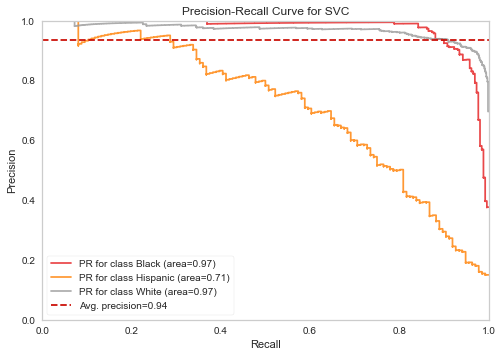

In [ ]:
operations_svc = [("scaler", MinMaxScaler()), ("svc", SVC(C=2, class_weight="balanced",random_state=101))]
model = Pipeline(steps=operations_svc)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

### PrecisionRecallCurve ile modeli sıfırladık

### Yukarıdaki grafikte Hispanic değeri 0.73'tü(lojistik regresyonun  model performansı), burada 0.71'e düştü

In [ ]:
y_pred = svm_model_grid.predict(X_test)

svc_AP = viz.score_["Hispanic"]
svc_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
svc_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

### svc_AP: svc average precision demektir.

## 3. RF

### RF: Random Forest

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
X2 = data.drop("DODRace",axis=1)
y = data.DODRace

In [ ]:
cat = X2.select_dtypes("object").columns
cat

Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')

### cat = X2.select_dtypes("object").columns
     cat 
     x2'deki object feature'ları cat değişkenine atama

In [ ]:
enc = OrdinalEncoder()
X2[cat] = enc.fit_transform(X2[cat])
X2.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,Age,WritingPreference
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,1.0,91.0,41,2.0
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,1.0,86.0,35,1.0
2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,1.0,86.0,42,1.0
3,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,1.0,133.0,31,2.0
4,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,188,954,1.0,90.0,21,2.0


### enc: encoder

### X2[cat] = enc.fit_transform(X2[cat]) yapınca;kategorik değerler içindeki unique değerelrin ('Gender', 'SubjectsBirthLocation', 'WritingPreference']) hepsini sayısdal değerlere atar.

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=101, stratify =y)

<IPython.core.display.Javascript object>

In [ ]:
print("Train features shape : ", X_train2.shape)
print("Train target shape   : ", y_train2.shape)
print("Test features shape  : ", X_test2.shape)
print("Test target shape    : ", y_test2.shape)

Train features shape :  (4615, 97)
Train target shape   :  (4615,)
Test features shape  :  (1154, 97)
Test target shape    :  (1154,)


### Vanilla RF Model

In [ ]:
rf_model = RandomForestClassifier(class_weight="balanced", random_state=101)

In [ ]:
rf_model.fit(X_train2, y_train2)

RandomForestClassifier(class_weight='balanced', random_state=101)

In [ ]:
eval_metric(rf_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[192   1  67]
 [  9   5 122]
 [ 11   0 747]]
              precision    recall  f1-score   support

       Black       0.91      0.74      0.81       260
    Hispanic       0.83      0.04      0.07       136
       White       0.80      0.99      0.88       758

    accuracy                           0.82      1154
   macro avg       0.85      0.59      0.59      1154
weighted avg       0.83      0.82      0.77      1154


Train_Set
[[1038    0    0]
 [   0  542    1]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [ ]:
model = RandomForestClassifier(class_weight="balanced", random_state=101)

scores = cross_validate(model, X_train2, y_train2, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

<IPython.core.display.Javascript object>

test_f1_Hispanic           0.082574
test_precision_Hispanic    0.775000
test_recall_Hispanic       0.044242
dtype: float64

### RF Model GridsearchCV

In [ ]:
param_grid = {'n_estimators':[400,500],
             'max_depth':[10,12,14,16]} #'min_samples_split':[18,20,22], 'max_features': ['auto', None, 15, 20]
             

In [ ]:
rf_model = RandomForestClassifier(class_weight="balanced", random_state=101)
rf_grid_model = GridSearchCV(rf_model,
                             param_grid,
                             verbose=3,
                             scoring=recall_Hispanic,
                             n_jobs=-1)

In [ ]:
rf_grid_model.fit(X_train2,y_train2)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=101),
             n_jobs=-1,
             param_grid={'max_depth': [10, 12, 14, 16],
                         'n_estimators': [400, 500]},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [ ]:
rf_grid_model.best_params_

{'max_depth': 10, 'n_estimators': 500}

In [ ]:
rf_grid_model.best_score_

0.22466870540265033

In [ ]:
eval_metric(rf_grid_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[210   2  48]
 [ 14  32  90]
 [ 21  28 709]]
              precision    recall  f1-score   support

       Black       0.86      0.81      0.83       260
    Hispanic       0.52      0.24      0.32       136
       White       0.84      0.94      0.88       758

    accuracy                           0.82      1154
   macro avg       0.74      0.66      0.68      1154
weighted avg       0.80      0.82      0.81      1154


Train_Set
[[1023    1   14]
 [   0  532   11]
 [   3   19 3012]]
              precision    recall  f1-score   support

       Black       1.00      0.99      0.99      1038
    Hispanic       0.96      0.98      0.97       543
       White       0.99      0.99      0.99      3034

    accuracy                           0.99      4615
   macro avg       0.98      0.99      0.99      4615
weighted avg       0.99      0.99      0.99      4615



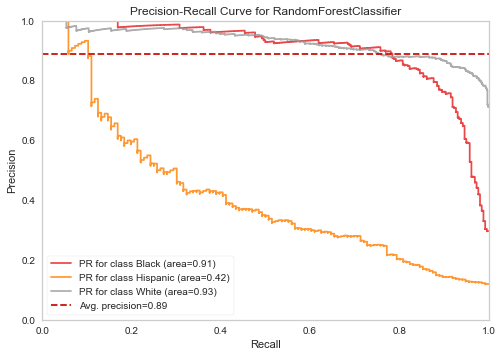

In [ ]:
model = RandomForestClassifier(class_weight="balanced", random_state=101, max_depth=10, n_estimators = 500)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train2, y_train2)
viz.score(X_test2, y_test2)
viz.show();

In [ ]:
y_pred = rf_grid_model.predict(X_test2)

rf_AP = viz.score_["Hispanic"]
rf_f1 = f1_score(y_test2, y_pred, average=None, labels=["Hispanic"])
rf_recall = recall_score(y_test2, y_pred, average=None, labels=["Hispanic"])

## 4. XGBoost

### Vanilla XGBoost Model

In [ ]:
xgb_model = XGBClassifier(random_state=101)

In [ ]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train2)
classes_weights

array([2.8330264 , 0.50703142, 0.50703142, ..., 0.50703142, 1.4820167 ,
       0.50703142])

### class_weight:modelde, inbalance olan datayı dengeleyecek parametre yoksa, dengesiz olan datayı dengeler.

### compute_sample_weight: gözlemlerin ağırlıklarını hesaplama

### y=y_train2: clasların sayısını verir. label encodera dönüşmüştü.

In [ ]:
xgb_model.fit(X_train2,y_train2, sample_weight=classes_weights)
# weight parameter in XGBoost is per instance not per class. Therefore, we need to assign the weight of each class to its instances, which is the same thing.

[13:16:27] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=101, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=None, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [ ]:
eval_metric(xgb_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[233   2  25]
 [ 12  60  64]
 [ 19  19 720]]
              precision    recall  f1-score   support

       Black       0.88      0.90      0.89       260
    Hispanic       0.74      0.44      0.55       136
       White       0.89      0.95      0.92       758

    accuracy                           0.88      1154
   macro avg       0.84      0.76      0.79      1154
weighted avg       0.87      0.88      0.87      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [ ]:
model = XGBClassifier(random_state=101)

scores = cross_validate(model, X_train2, y_train2, scoring = scoring, cv = 10, fit_params={"sample_weight":classes_weights})
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

[13:16:36] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:16:46] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:16:53] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:16:59] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

<IPython.core.display.Javascript object>

test_f1_Hispanic           0.562256
test_precision_Hispanic    0.726559
test_recall_Hispanic       0.460168
dtype: float64

### XGBoost Model GridsearchCV

In [ ]:
comp = pd.DataFrame(classes_weights)

comp["label"]= y_train2.reset_index(drop=True)
comp.groupby("label")[0].value_counts()

<IPython.core.display.Javascript object>

label     0       
Black     1.482017    1038
Hispanic  2.833026     543
White     0.507031    3034
Name: 0, dtype: int64

### Black     1.482017    Hispanic  2.833026     White     0.507031   : rakamların  ağırlıklandırma katsayısıdır.Burada en fazla Hispanice ağırılık verilmiş

### y_train2.reset_index(drop=True): y_train2'nin indexlerini sıfırlar

In [ ]:
param_grid = {"n_estimators":[100, 300],
              'max_depth':[3,5,6],
              "learning_rate": [0.1, 0.3],
              "subsample":[0.5, 1],
              "colsample_bytree":[0.5, 1]}

In [ ]:
xgb_model = XGBClassifier(random_state=101)
xgb_grid_model = GridSearchCV(xgb_model, 
                              param_grid, 
                              scoring=recall_Hispanic, 
                              n_jobs = -1, 
                              verbose = 2).fit(X_train2, y_train2,sample_weight=classes_weights)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[13:48:41] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
xgb_grid_model.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 100,
 'subsample': 1}

In [ ]:
xgb_grid_model.best_score_

0.6445124023105675

In [ ]:
eval_metric(xgb_grid_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[230  12  18]
 [ 10  88  38]
 [ 43  97 618]]
              precision    recall  f1-score   support

       Black       0.81      0.88      0.85       260
    Hispanic       0.45      0.65      0.53       136
       White       0.92      0.82      0.86       758

    accuracy                           0.81      1154
   macro avg       0.73      0.78      0.75      1154
weighted avg       0.84      0.81      0.82      1154


Train_Set
[[ 972   28   38]
 [  17  462   64]
 [  81  329 2624]]
              precision    recall  f1-score   support

       Black       0.91      0.94      0.92      1038
    Hispanic       0.56      0.85      0.68       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.84      4615
weighted avg       0.90      0.88      0.89      4615



[13:48:44] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:48:46] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:48:48] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


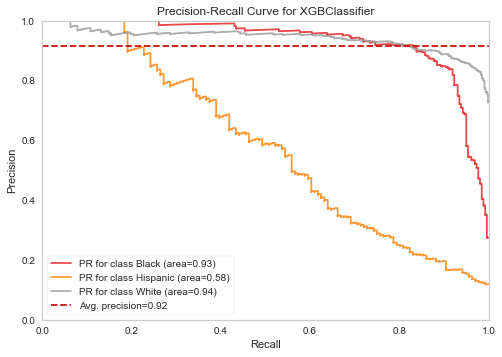

In [ ]:
model = XGBClassifier(random_state=101, colsample_bytree=0.5, subsample=0.5)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1",
    sample_weight=classes_weights
)
viz.fit(X_train2, y_train2)
viz.score(X_test2, y_test2)
viz.show();

In [ ]:
y_pred = xgb_grid_model.predict(X_test2)

xgb_AP = viz.score_["Hispanic"]
xgb_f1 = f1_score(y_test2, y_pred, average=None, labels=["Hispanic"])
xgb_recall = recall_score(y_test2, y_pred, average=None, labels=["Hispanic"])

### xgb_f1 = f1_score(y_test2, y_pred, average=None, labels=["Hispanic"])
xgb_recall = recall_score(y_test2, y_pred, average=None, labels=["Hispanic"])
ARRAY OLARAK DÖNDÜRÜLÜR.

## Comparing Models

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

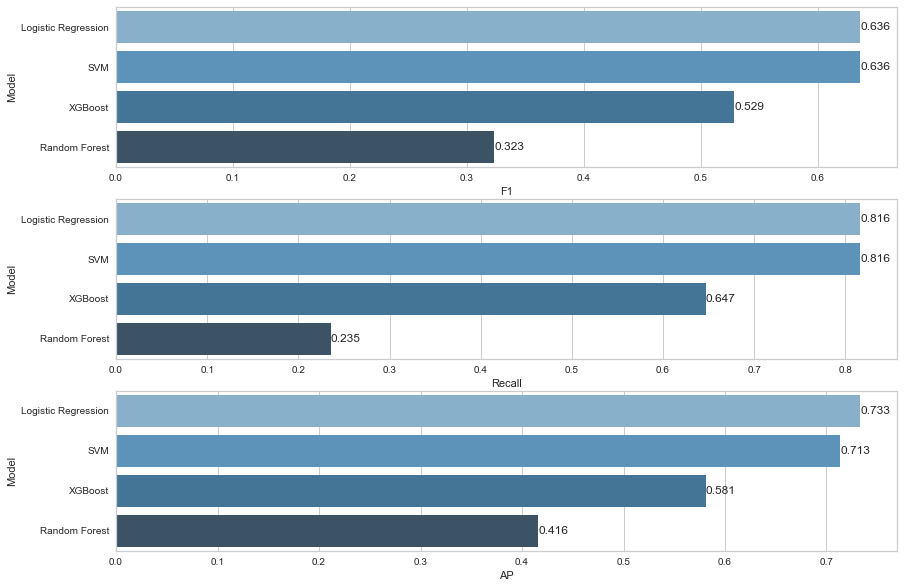

In [ ]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "SVM",  "Random Forest", "XGBoost"],
                        "F1": [log_f1[0], svc_f1[0], rf_f1[0], xgb_f1[0]],
                        "Recall": [log_recall[0], svc_recall[0], rf_recall[0], xgb_recall[0]],
                        "AP": [log_AP, svc_AP, rf_AP, xgb_AP]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax=sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

### [log_f1[0], svc_f1[0], rf_f1[0], xgb_f1[0]'lardaki 0'lar arraylardeki değerleri grafikte göstermek içindir.

### "AP": average precision.Dengesiz veri setinde modelin genel performansını verir.

### SVM'nin çalışma maliyeti var ve feature importance özelliği yok.

### Logistic regresyonun feature importance yapma özelliği var(Ridge ve Lasso ile).

### KNN'nin feature importance özelliği yok.

## BURADA LOJİSTİK REGRESYON MODELİNİ SEÇMEK GEREKLİ.

---
---

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [ ]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
final_model = Pipeline(steps=operations)

In [ ]:
final_model.fit(X, y)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

In [ ]:
X.describe()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Age,Gender_Male,SubjectsBirthLocation_Alaska,SubjectsBirthLocation_Antigua and Barbuda,SubjectsBirthLocation_Argentina,SubjectsBirthLocation_Arizona,SubjectsBirthLocation_Arkansas,SubjectsBirthLocation_Azerbaijan,SubjectsBirthLocation_Bahamas,SubjectsBirthLocation_Barbados,SubjectsBirthLocation_Belarus,SubjectsBirthLocation_Belgium,SubjectsBirthLocation_Belize,SubjectsBirthLocation_Bermuda,SubjectsBirthLocation_Bolivia,SubjectsBirthLocation_Bosnia and Herzegovina,SubjectsBirthLocation_Brazil,SubjectsBirthLocation_British Virgin Islands,SubjectsBirthLocation_Bulgaria,SubjectsBirthLocation_California,SubjectsBirthLocation_Cameroon,SubjectsBirthLocation_Canada,SubjectsBirthLocation_Cape Verde,SubjectsBirthLocation_Chile,SubjectsBirthLocation_Colombia,SubjectsBirthLocation_Colorado,SubjectsBirthLocation_Connecticut,SubjectsBirthLocation_Costa Rica,SubjectsBirthLocation_Cuba,SubjectsBirthLocation_Delaware,SubjectsBirthLocation_Denmark,SubjectsBirthLocation_District of Columbia,SubjectsBirthLocation_Dominica,SubjectsBirthLocation_Dominican Republic,SubjectsBirthLocation_Ecuador,SubjectsBirthLocation_Egypt,SubjectsBirthLocation_El Salvador,SubjectsBirthLocation_Ethiopia,SubjectsBirthLocation_Florida,SubjectsBirthLocation_France,SubjectsBirthLocation_French Guiana,SubjectsBirthLocation_Georgia,SubjectsBirthLocation_Germany,SubjectsBirthLocation_Ghana,SubjectsBirthLocation_Grenada,SubjectsBirthLocation_Guadalupe,SubjectsBirthLocation_Guam,SubjectsBirthLocation_Guatemala,SubjectsBirthLocation_Guyana,SubjectsBirthLocation_Haiti,SubjectsBirthLocation_Hawaii,SubjectsBirthLocation_Honduras,SubjectsBirthLocation_Iceland,SubjectsBirthLocation_Idaho,SubjectsBirthLocation_Illinois,SubjectsBirthLocation_India,SubjectsBirthLocation_Indiana,SubjectsBirthLocation_Iowa,SubjectsBirthLocation_Iran,SubjectsBirthLocation_Iraq,SubjectsBirthLocation_Israel,SubjectsBirthLocation_Italy,SubjectsBirthLocation_Ivory Coast,SubjectsBirthLocation_Jamaica,SubjectsBirthLocation_Japan,SubjectsBirthLocation_Kansas,SubjectsBirthLocation_Kentucky,SubjectsBirthLocation_Kenya,SubjectsBirthLocation_Lebanon,SubjectsBirthLocation_Liberia,SubjectsBirthLocation_Louisiana,SubjectsBirthLocation_Maine,SubjectsBirthLocation_Maryland,SubjectsBirthLocation_Massachusetts,SubjectsBirthLocation_Mexico,SubjectsBirthLocation_Michigan,SubjectsBirthLocation_Minnesota,S

In [ ]:
mean_human = X.describe().loc["mean"]
mean_human

abdominalextensiondepthsitting                   247.254290
acromialheight                                  1408.630265
acromionradialelength                            328.071590
anklecircumference                               225.201768
axillaheight                                    1301.902583
balloffootcircumference                          244.408043
balloffootlength                                 195.118911
biacromialbreadth                                399.706015
bicepscircumferenceflexed                        341.663027
bicristalbreadth                                 274.903449
bideltoidbreadth                                 491.454845
bimalleolarbreadth                                72.335413
bitragionchinarc                                 324.962212
bitragionsubmandibulararc                        306.677760
bizygomaticbreadth                               139.529381
buttockcircumference                            1022.059456
buttockdepth                            

In [ ]:
final_model.predict(X.loc[[201]])

array(['Hispanic'], dtype=object)

### X.loc[[201]]): 2 tane köşeli parantez var. prediction, veriyi dataframe boyutunda ister. Data hangi bayutta eğitildi ise prediction da o boyutta ister.Dolayısıyla eğitim dataframe(2 boyutlu) olduğu için prediction da 2 boyutlu seçildi.

In [ ]:
y[201]

'Hispanic'

In [ ]:
final_model.predict([mean_human])

array(['White'], dtype=object)

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

### Aldığımız skorları daha ne kadar iyileştirebiliriz veya iyileştiremez miyiz diye bakıyoruz.

In [ ]:
from sklearn.metrics import matthews_corrcoef

y_pred = final_model.predict(X_test)

matthews_corrcoef(y_test, y_pred)

0.7827657214688859

### matthews_corrcoef: Bizim aldığımız gerçek değerlerle tahmin edilen değerler arasındaki korelasyon değerleri

### 0.7827657214688859= modelin performansı. Yukarıdaki metriklerin yerine kullanılır. Detayı yukarıdaki linkte. Yukarıdaki kod, dengesiz veri setlerinde kullanılır.

In [ ]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.7737579800746648

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

### SMOTE; datamdaki dengesiz veri setlerini datamdaki en büyük gözlem hangi classa aitse onun sayısına direkt eşitler. 

##  Smote implement

In [ ]:
#!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline

ModuleNotFoundError: No module named 'imblearn'

### import Pipeline as imbpipeline: sklearn'ün kendi pipeline'ı değil.

In [ ]:
over = SMOTE(sampling_strategy={"Hispanic": 1200})
under = RandomUnderSampler(sampling_strategy={"White": 2500})

In [ ]:
X_resampled_over, y_resampled_over = over.fit_resample(X_train, y_train)

### yukarıdaki kod; gözlem sayısının artırılması sadece train setine uygulanır.

In [ ]:
y_resampled_over.value_counts()

In [ ]:
X_resampled_under, y_resampled_under = under.fit_resample(X_train, y_train)

In [ ]:
y_resampled_under.value_counts()

In [ ]:
# we are configuring our pipeline steps
steps = [('o', over), ('u', under)]

# create a pipeline that will automatically apply over and under
# sampling in order to steps that we created.
pipeline = imbpipeline(steps=steps)

# we will create new data over X_train and y_train.
# We simply delete some of our samples if its race "white" and we add synthetic samples to "hispanics".
X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)

### 'u', under; belirtilen sayı kadar değer atar.

In [ ]:
y_resampled.value_counts()

In [ ]:
y_train.value_counts()

## Logistic Regression Over/Under Sampling

In [ ]:
operations = [('o', over), ('u', under), ("scaler", MinMaxScaler()), 
              ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]

In [ ]:
smote_pipeline = imbpipeline(steps=operations)

In [ ]:
smote_pipeline.fit(X_train, y_train)

In [ ]:
eval_metric(smote_pipeline, X_train, y_train, X_test, y_test)

In [ ]:
model = smote_pipeline = imbpipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

### Sonuçta smooth bir işe yaramadı. birbirine girift oan verilerin çoğunda smooth işe yaramaz

#  SHAP

## ÇOK ÖNEMLİ BİR KÜTÜPHANE. Shap; bir tahmin yaparken gözlem bazında veya tüm data içinde classları tahmin ederken hangi feature'ın ne kadar etkisinin olduğunu gösteriyor.Burada random forest veya XGBoostta yaptığımız feature importance yapmıyacağız.

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

In [ ]:
# !pip install shap

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model_shap = LogisticRegression(class_weight='balanced',max_iter=10000, random_state=101, penalty="l1", solver='saga')
model_shap.fit(X_train_scaled, y_train)

### penalty="l1" de penalty mutlaka "l1" olmalı.

### PİPELİNE'ı kullanacaksan shap hata verir.Burada modeli olduğu şekilde vermek lazım.Feature importance'ın başarılı olamssı için datanın scale edilmesi lazım.

In [ ]:
eval_metric(model_shap, X_train_scaled, y_train, X_test_scaled, y_test)

In [ ]:
import shap
explainer = shap.Explainer(model_shap,X_train_scaled)
start_index = 203
end_index = 204
shap_values = explainer.shap_values(X_test_scaled[start_index:end_index])

## model_shap; tahminin iyi olduğu modeldir.

### start_index = 203'üncü gözlemimizde hangi hangi feature'ın daha fazla etkisinin olduğunu gösteriyor.Burada sadece bir gözlem var.

### X_test_scaled; o gözlemi tahmin etmede hangi feature'ın ne kadara katkısının olduğunu gözlem olarak gösteriyor.

In [ ]:
shap_values

In [ ]:
shap_values[0][0]

In [ ]:
shap_values[1][0]

In [ ]:
shap_values[2][0]

In [ ]:
shap_values[0].shape

In [ ]:
# %% >> Visualize local predictions
shap.initjs()
# Force plot
prediction = model_shap.predict(X_test_scaled[start_index:end_index])[0]
print(f"The log_model predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[1],
                X_test_scaled[start_index:end_index], # for values
                feature_names= X.columns) 

### shap_values[1]: Hispanic values'ı gösteriyor.

In [ ]:
explainer.expected_value[1]

In [ ]:
X_test_scaled[203]

In [ ]:
shap.force_plot(explainer.expected_value[0],
                shap_values[0],
                X_test_scaled[start_index:end_index], # for values
                feature_names= X.columns) 

In [ ]:
shap.force_plot(explainer.expected_value[2],
                shap_values[2],
                X_test_scaled[start_index:end_index], # for values
                feature_names= X.columns)

## Shap values for all data

In [ ]:
explainer = shap.Explainer(model_shap, X_train_scaled)

shap_values = explainer.shap_values(X_test_scaled)

In [ ]:
shap.summary_plot(shap_values, X_train_scaled, max_display=300,feature_names = X.columns)

### shap.summary_plot(shap_values, X_train_scaled, max_display=300,feature_names = X.columns); ÇOK ÖNEMLİ

In [ ]:
hispanic = ["SubjectsBirthLocation",  'handlength',  'forearmcircumferenceflexed', "headlength", 'bitragionsubmandibulararc',
            'footbreadthhorizontal',  'bimalleolarbreadth', 'poplitealheight', 'waistdepth', 'WritingPreference', 'tragiontopofhead',
            'bideltoidbreadth', 'neckcircumferencebase', 'biacromialbreadth','buttockheight', 'buttockkneelength', 'earlength', 
            'axillaheight', "Age"]

In [ ]:
#list(X.columns)

In [ ]:
X3 = data[hispanic]
X3 = pd.get_dummies(data=X3, drop_first=True)
y = data.DODRace

In [ ]:
X3.shape

In [ ]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y, test_size=0.2, random_state=101, stratify =y)

In [ ]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101,
                                                                    penalty="l1", solver='saga'))]
pipe_shap_model = Pipeline(steps=operations)

In [ ]:
pipe_shap_model.fit(X_train3, y_train3)

In [ ]:
eval_metric(pipe_shap_model, X_train3, y_train3, X_test3, y_test3)

In [ ]:
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train3, y_train3, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve
model = Pipeline(steps=operations)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train3, y_train3)
viz.score(X_test3, y_test3)
viz.show();

## SMOTE for X3 dataset

In [ ]:
operations = [('o', over), ('u', under), ("scaler", MinMaxScaler()), 
              ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]

In [ ]:
smote_pipeline_2 = imbpipeline(steps=operations)

In [ ]:
smote_pipeline_2.fit(X_train3, y_train3)

In [ ]:
eval_metric(smote_pipeline_2, X_train3, y_train3, X_test3, y_test3)

In [ ]:
model = imbpipeline(steps=operations)

scores = cross_validate(model, X_train3, y_train3, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

## Find the best threshold for multiclassification

In [ ]:
y2 = y.map({"Hispanic":1, "White":0, "Black":0})

In [ ]:
y2

In [ ]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X3, y2, test_size=0.2, random_state=101, stratify =y2)

In [ ]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
pipe_shap_model2 = Pipeline(steps=operations)

In [ ]:
pipe_shap_model2.fit(X_train4, y_train4)

In [ ]:
eval_metric(pipe_shap_model2, X_train4, y_train4, X_test4, y_test4)

In [ ]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(max_iter=10000,random_state=101))]
log_basic_model = Pipeline(steps=operations)

log_basic_model.fit(X_train4, y_train4)
plot_precision_recall_curve(log_basic_model, X_train4, y_train4);

In [ ]:
y_pred_proba = log_basic_model.predict_proba(X_train4)
average_precision_score(y_train4, y_pred_proba[:,1])

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_train4, y_pred_proba[:,1])

In [ ]:
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

In [ ]:
y_pred2 = pd.Series(pipe_shap_model2.predict_proba(X_test4)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)

In [ ]:
print(confusion_matrix(y_test4,y_pred2))
print(classification_report(y_test4,y_pred2))

In [ ]:
y_train_pred2 = pd.Series(pipe_shap_model2.predict_proba(X_train4)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
print(confusion_matrix(y_train4, y_train_pred2))
print(classification_report(y_train4, y_train_pred2))

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

def CV(n, est, X, y, optimal_threshold):
    skf = StratifiedKFold(n_splits = n, shuffle = True, random_state = 42)
    acc_scores = []
    pre_scores = []
    rec_scores = []
    f1_scores  = []
    
    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)
    
    for train_index, test_index in skf.split(X, y):
        
        X_train = X.loc[train_index]
        y_train = y.loc[train_index]
        X_test = X.loc[test_index]
        y_test = y.loc[test_index]
        
        
        est = est
        est.fit(X_train, y_train)
        y_pred = est.predict(X_test)
        y_pred_proba = est.predict_proba(X_test)
             
        y_pred2 = pd.Series(y_pred_proba[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
        
        acc_scores.append(accuracy_score(y_test, y_pred2))
        pre_scores.append(precision_score(y_test, y_pred2, pos_label=1))
        rec_scores.append(recall_score(y_test, y_pred2, pos_label=1))
        f1_scores.append(f1_score(y_test, y_pred2, pos_label=1))
    
    print(f'Accuracy {np.mean(acc_scores)*100:>10,.2f}%  std {np.std(acc_scores)*100:.2f}%')
    print(f'Precision-1 {np.mean(pre_scores)*100:>7,.2f}%  std {np.std(pre_scores)*100:.2f}%')
    print(f'Recall-1 {np.mean(rec_scores)*100:>10,.2f}%  std {np.std(rec_scores)*100:.2f}%')
    print(f'F1_score-1 {np.mean(f1_scores)*100:>8,.2f}%  std {np.std(f1_scores)*100:.2f}%')

In [ ]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
model = Pipeline(steps=operations)
CV(10, model, X_train4, y_train4, optimal_threshold)

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>
